In [3]:
import os
import numpy as np
from typing import Union

from scanip.image_proc import load_image
from imageprocessing import process_image

## Input Data for calibration

CALIBRATION_PHOTO = os.getcwd() + '/prism_calibration_capture.jpg'

%store CALIBRATION_PHOTO

prism_photo = load_image(CALIBRATION_PHOTO)

%store prism_photo


Stored 'CALIBRATION_PHOTO' (str)


Stored 'prism_photo' (ndarray)


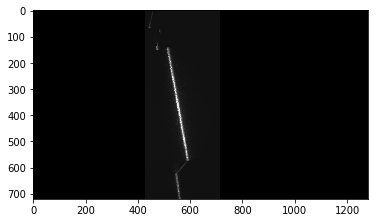

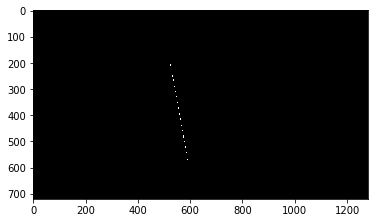

Stored 'points' (list)


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

from pyramidcalibration import set_from_nparray
from pyramidcalibration import filter_points
## Basic operation for laser line detection

# crop image

prism_photo[:, 0:428] = 0
prism_photo[:, 713:] = 0

plt.imshow(prism_photo, cmap='gray')
plt.show()

points = process_image(prism_photo)

plt.imshow(points, cmap='gray')
plt.show()

points = np.where(points == True)

points = set_from_nparray(points)
points = filter_points(points, 428, 713)  # for camera 1

%store points

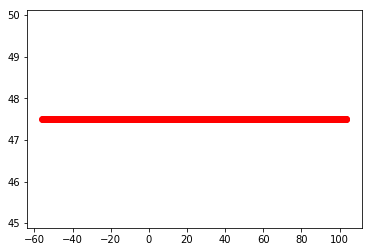

Stored 'relations' (dict)


In [5]:
from pyramidcalibration import line_trans_relations, update_relation
from scanip.visualize import display_points

## Prism coordinates transformation

relations: dict = dict()

y: Union[int, float] = 47.5
y_step: Union[int, float] = 19 / 44

## Mapping creation

try:
    new_relations = line_trans_relations(points, y)
    relations = update_relation(relations, new_relations)
    
    %matplotlib inline
    display_points(relations.values())
    
except ZeroDivisionError:
    pass

%store relations

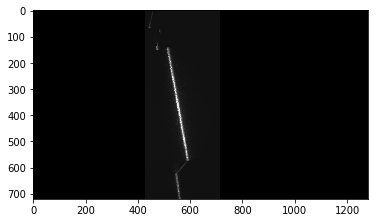

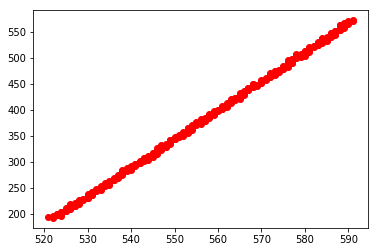

{'(591, 572)': (-56.0, 47.5), '(591, 571)': (-55.5801, 47.5), '(590, 570)': (-55.1602, 47.5), '(590, 569)': (-54.7403, 47.5), '(590, 568)': (-54.3204, 47.5), '(590, 567)': (-53.9005, 47.5), '(589, 566)': (-53.4806, 47.5), '(589, 565)': (-53.0607, 47.5), '(590, 564)': (-52.6408, 47.5), '(588, 563)': (-52.2209, 47.5), '(588, 562)': (-51.801, 47.5), '(588, 561)': (-51.3811, 47.5), '(589, 560)': (-50.9612, 47.5), '(588, 559)': (-50.5413, 47.5), '(588, 558)': (-50.1214, 47.5), '(589, 557)': (-49.7015, 47.5), '(588, 556)': (-49.2816, 47.5), '(588, 555)': (-48.8617, 47.5), '(588, 554)': (-48.4418, 47.5), '(588, 553)': (-48.0219, 47.5), '(587, 552)': (-47.602, 47.5), '(587, 551)': (-47.1821, 47.5), '(587, 550)': (-46.7622, 47.5), '(587, 549)': (-46.3423, 47.5), '(586, 548)': (-45.9224, 47.5), '(586, 547)': (-45.5025, 47.5), '(587, 546)': (-45.0826, 47.5), '(587, 545)': (-44.6627, 47.5), '(587, 544)': (-44.2428, 47.5), '(586, 543)': (-43.8229, 47.5), '(586, 542)': (-43.403, 47.5), '(586, 541)':

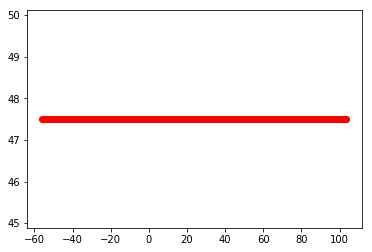

In [ ]:
## Input Data For Transformation

# XXX TODO FOR NOW WE WILL USE THE SAME IMAGE AND WE SHOULD GET IDEAL LINE

from pyramidtransform import transform_points
from scanip.visualize import display_points

image = load_image(CALIBRATION_PHOTO)

image[:, 0:428] = 0
image[:, 713:] = 0

plt.imshow(image, cmap='gray')
plt.show()

input_points = process_image(image)

input_points = np.where(input_points == True)

display_points(set_from_nparray(input_points))

print(relations)

transformed_points = transform_points(input_points, relations)

display_points(transformed_points)